In [18]:
# Regular EDA and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [2]:
df = pd.read_csv('heart-disease.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


1. age - tuổi
2. sex - giới tính (1 = nam; 0 = nữ)
3. cp - loại đau ngực
   * 0: Đau thắt ngực điển hình: đau ngực liên quan đến giảm cung cấp máu cho tim
   * 1: Đau thắt ngực không điển hình: đau ngực không liên quan đến tim
   * 2: Đau không phải do thắt ngực: thường là co thắt thực quản (không liên quan đến tim)
   * 3: Không có triệu chứng: đau ngực không có dấu hiệu bệnh
4. trestbps - huyết áp nghỉ ngơi (mm Hg khi nhập viện)
   * Bất kỳ giá trị nào trên 130-140 thường là nguyên nhân gây lo ngại
5. chol - lượng cholesterol trong máu (mg/dl)
   * serum = LDL + HDL + .2 * triglycerides
   * Trên 200 là nguyên nhân gây lo ngại
6. fbs - lượng đường trong máu khi đói > 120 mg/dl (1 = đúng; 0 = sai)
   * '>126' mg/dL là dấu hiệu của bệnh tiểu đường
7. restecg - kết quả điện tâm đồ khi nghỉ ngơi
   * 0: Không có gì đáng chú ý
   * 1: Bất thường sóng ST-T
     - Có thể từ triệu chứng nhẹ đến vấn đề nghiêm trọng
     - Báo hiệu nhịp tim không bình thường
   * 2: Có thể hoặc chắc chắn phì đại tâm thất trái
     - Buồng bơm chính của tim bị phì đại
8. thalach - nhịp tim tối đa đạt được
9. exang - đau thắt ngực khi tập thể dục (1 = có; 0 = không)
10. oldpeak - mức độ trầm cảm ST do tập thể dục so với khi nghỉ ngơi
   * Xem mức độ căng thẳng của tim khi tập thể dục
   * Tim không khỏe sẽ căng thẳng hơn
11. slope - độ dốc của đoạn ST khi tập thể dục
   * 0: Dốc lên: nhịp tim tốt hơn khi tập thể dục (hiếm gặp)
   * 1: Dốc ngang: thay đổi tối thiểu (tim khỏe mạnh điển hình)
   * 2: Dốc xuống: dấu hiệu của tim không khỏe
12. ca - số lượng mạch chính (0-3) được hiển thị qua phương pháp chụp huỳnh quang
   * Mạch máu có màu có nghĩa là bác sĩ có thể thấy máu chảy qua
   * Càng nhiều máu lưu thông càng tốt (không có cục máu đông)
13. thal - kết quả stress thalium
   * 1: bình thường
   * 2: khuyết tật cố định: từng bị khuyết tật nhưng giờ đã ổn
   * 3: khuyết tật có thể hồi phục: không có sự di chuyển máu đúng cách khi tập thể dục
14. target - có bệnh hay không (1=có, 0=không) (đây là thuộc tính dự đoán)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

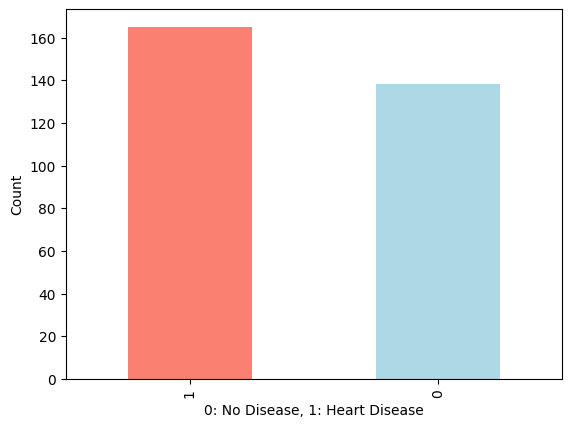

In [6]:
df['target'].value_counts().plot.bar(color=['salmon', 'lightblue']);
plt.xlabel('0: No Disease, 1: Heart Disease')
plt.ylabel('Count');

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [8]:
df['sex'].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [9]:
pd.crosstab(df['sex'], df['target'])

target,0,1
sex,,
0,24,72
1,114,93


In [10]:
72/(24+72), 93/(114+93)

(0.75, 0.4492753623188406)

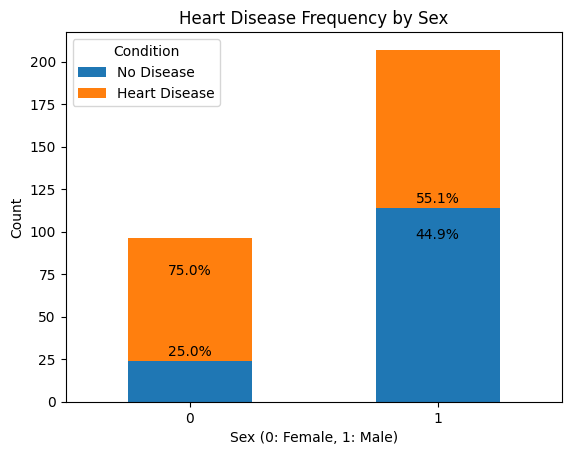

In [15]:
crosstab = pd.crosstab(df['sex'], df['target'])

crosstab = pd.crosstab(df['sex'], df['target'])
crosstab_perc = crosstab.div(crosstab.sum(1), axis=0)  # Tính phần trăm


ax = crosstab.plot(kind='bar', stacked=True)
plt.title('Heart Disease Frequency by Sex')
plt.xlabel('Sex (0: Female, 1: Male)')
plt.ylabel('Count')
plt.legend(['No Disease', 'Heart Disease'], title='Condition')
plt.xticks(rotation=0)

for i in range(crosstab.shape[0]):
    for j in range(crosstab.shape[1]):
        count = crosstab.iloc[i, j]
        percent = crosstab_perc.iloc[i, j] * 100
        ax.text(i, count + 1, f'{percent:.1f}%', ha='center', va='bottom')

plt.show()

In [19]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

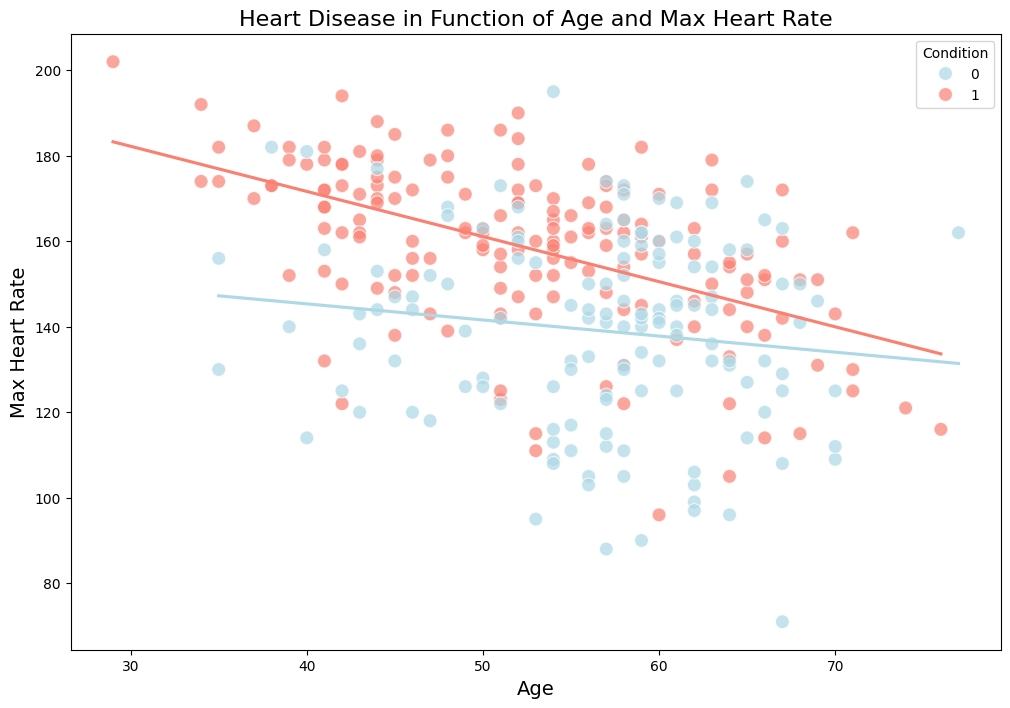

In [16]:
plt.figure(figsize=(12, 8))

sns.scatterplot(data=df, x='age', y='thalach', hue='target', palette={1: 'salmon', 0: 'lightblue'}, s=100, alpha=0.7, edgecolor='w')

sns.regplot(data=df[df.target==1], x='age', y='thalach', scatter=False, color='salmon', ci=None, line_kws={'label': 'Heart Disease'})

sns.regplot(data=df[df.target==0], x='age', y='thalach', scatter=False, color='lightblue', ci=None, line_kws={'label': 'No Disease'})

plt.title('Heart Disease in Function of Age and Max Heart Rate', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Max Heart Rate', fontsize=14)

plt.legend(title='Condition')
plt.show()

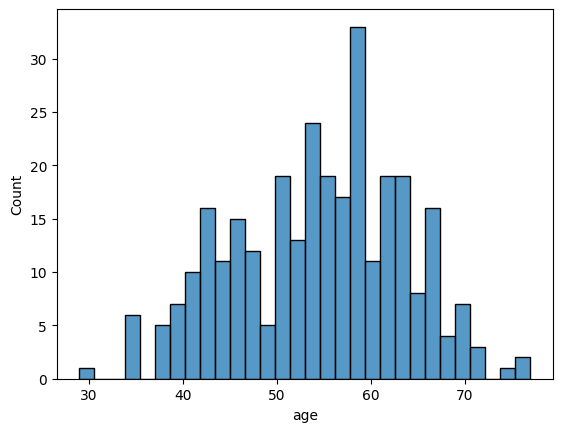

In [20]:
sns.histplot(data=df, x=df['age'], bins=30);

In [21]:
pd.crosstab(df['target'], df['cp'])

cp,0,1,2,3
target,,,,
0,104,9,18,7
1,39,41,69,16


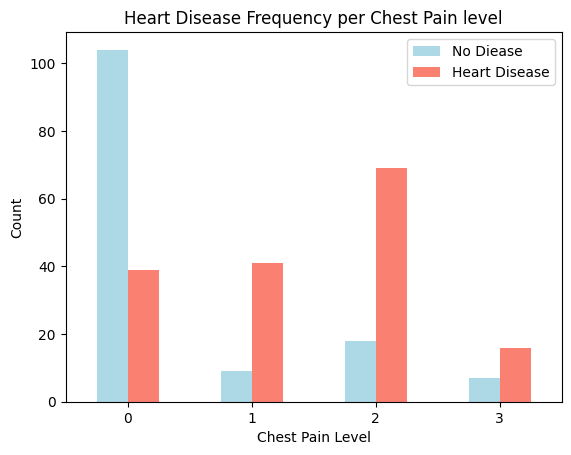

In [22]:
pd.crosstab(df['cp'], df['target']).plot(kind='bar', color=['lightblue', 'salmon']);

plt.title('Heart Disease Frequency per Chest Pain level')
plt.xlabel('Chest Pain Level')
plt.ylabel('Count')
plt.legend(['No Diease', 'Heart Disease'])
plt.xticks(rotation=0);

In [23]:
df.corr()['target']

age        -0.225439
sex        -0.280937
cp          0.433798
trestbps   -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
thalach     0.421741
exang      -0.436757
oldpeak    -0.430696
slope       0.345877
ca         -0.391724
thal       -0.344029
target      1.000000
Name: target, dtype: float64

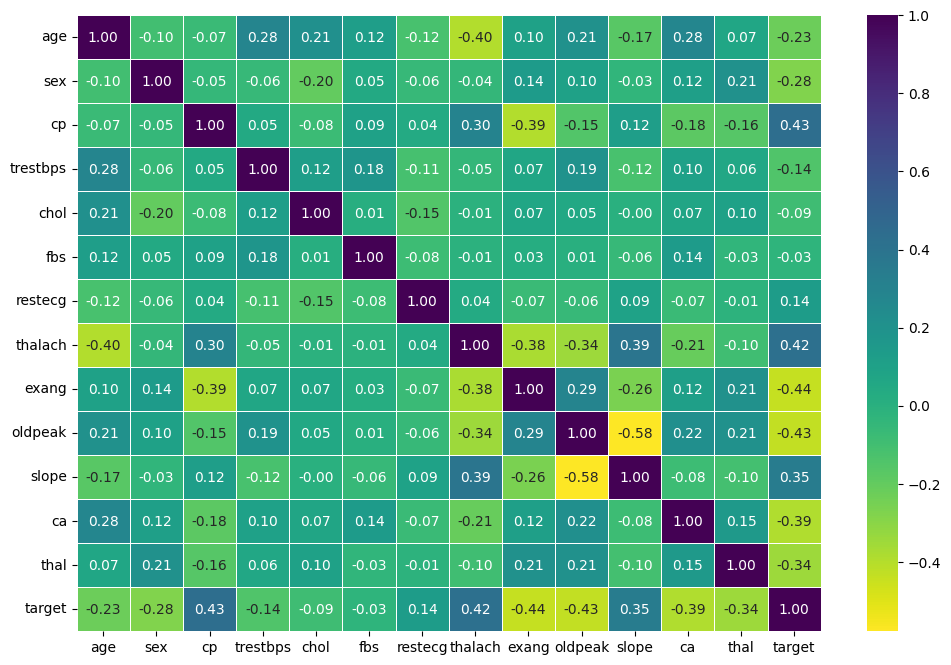

In [24]:
# visualization
corr_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, linewidth=0.5, fmt='.2f', cmap='viridis_r');

# Modelling

In [25]:
# split features and labels
X = df.drop('target', axis=1)
y = df['target']

# split into training, testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# split into training, testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

# Model Training

In [28]:
# put models in dictionary

models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(),
    'RandomForestClassifer': RandomForestClassifier()
}

# create function to fit and score model
def fit_and_score(models, X_train, X_test, y_train, y_test):

    # set random seed
    np.random.seed(42)

    # make dictonary to keep scores
    model_scores = {}

    # loop through models to fit and score
    for model_name, model in models.items():
        model.fit(X_train, y_train) # fit model
        score = model.score(X_test, y_test) # get score
        model_scores[model_name] = score # put score for each model

    return model_scores

    # fit and score
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)

model_scores

{'LogisticRegression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'RandomForestClassifer': 0.8360655737704918}

In [29]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])

model_compare.head()

,LogisticRegression,KNN,RandomForestClassifer
accuracy,0.885246,0.688525,0.836066


# Hyperparameter Tuning - using GridSearchCV

In [30]:
# create hyperparameter grid for Logistic Regression
log_reg_grid = {
    'C': np.logspace(-4, 4, 20),
    'solver': ['liblinear']
}

# set up grid hyperparameter search for Logistic Regression
gs_log_reg = GridSearchCV(LogisticRegression(),
                                          log_reg_grid,
                                          cv=5,
                                          verbose=True)

# train the model
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [31]:
# get best parameters
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [34]:
# get the score
gs_log_reg.score(X_test, y_test)

0.8852459016393442

# Evaluating Models

In [ ]:
# make predictions
y_preds = gs_log_reg.predict(X_test)

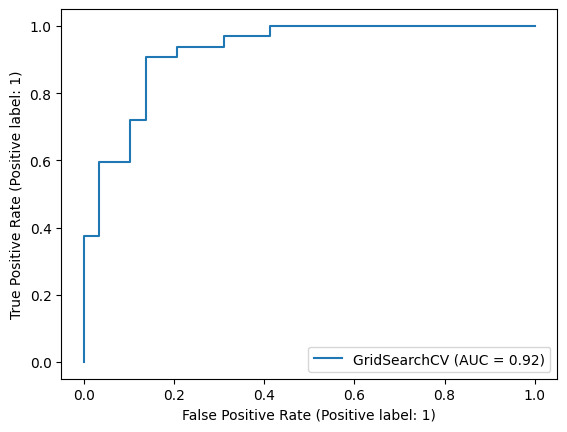

In [ ]:
# ROC curve and AUC
RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test)
plt.show()

In [ ]:
confusion_matrix(y_test, y_preds)

array([[25,  4],
       [ 3, 29]])

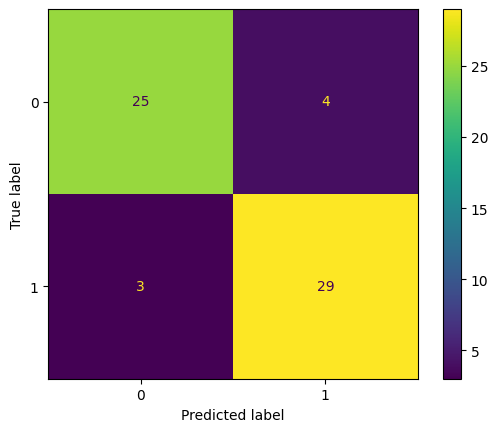

In [ ]:
ConfusionMatrixDisplay.from_estimator(gs_log_reg, X_test, y_test)
plt.show()

In [ ]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



# Calculate evaluation metrics using Cross Validated Precision, Recall and F1 score

In [ ]:
# check current best parameter
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [ ]:
# create a new classifier with current best parameter
clf = LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [ ]:
# Cross Validated Accuracy
cv_accuracy = cross_val_score(clf, X, y, scoring='accuracy', cv=5)
cv_accuracy

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [ ]:
# mean of cross valided accuracy
cv_accuracy = np.mean(cv_accuracy)
cv_accuracy

0.8479781420765027

In [ ]:
# Cross Validated Precision
cv_precision = cross_val_score(clf, X, y, scoring='precision', cv=5)

cv_precision = np.mean(cv_precision)
cv_precision

0.8215873015873015

In [ ]:
# Cross Validated Recall
cv_recall = cross_val_score(clf, X, y, scoring='recall', cv=5)

cv_recall = np.mean(cv_recall)
cv_recall

0.9272727272727274

In [ ]:
# Cross Validated F1
cv_f1 = cross_val_score(clf, X, y, scoring='f1', cv=5)

cv_f1 = np.mean(cv_f1)
cv_f1

0.8705403543192143

In [ ]:
print(cv_accuracy)
print(cv_precision)
print(cv_recall)
print(cv_f1)

0.8479781420765027
0.8215873015873015
0.9272727272727274
0.8705403543192143


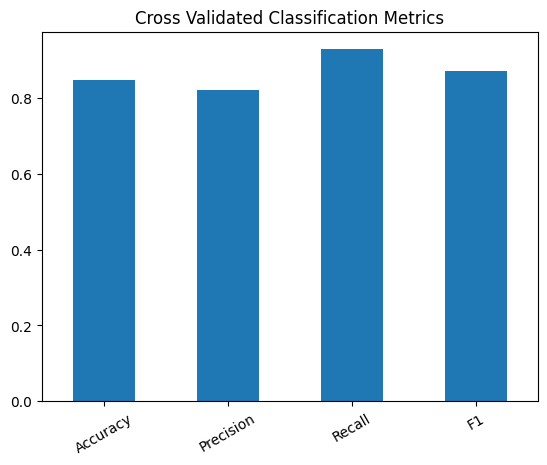

In [ ]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({'Accuracy': cv_accuracy,
                                            'Precision': cv_precision,
                                            'Recall': cv_recall,
                                            'F1': cv_f1},
                                             index=[0])

cv_metrics.T.plot.bar(legend=False);

plt.title('Cross Validated Classification Metrics')
plt.xticks(rotation=30);

# Feature Importance

In [ ]:
model = LogisticRegression(C=0.23357214690901212, solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [ ]:
# check Coefficient of features
model.coef_

array([[ 0.00369922, -0.9042409 ,  0.67472826, -0.0116134 , -0.00170364,
         0.04787688,  0.33490198,  0.02472938, -0.63120406, -0.5759095 ,
         0.47095141, -0.65165348, -0.69984208]])

In [ ]:
df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


In [ ]:
# Match coef's of features to columns name
feature_dict = dict(zip(df.columns, list(model.coef_[0])))

feature_dict

{'age': 0.003699220776580221,
 'sex': -0.9042409028785717,
 'cp': 0.6747282587404362,
 'trestbps': -0.011613401339975146,
 'chol': -0.0017036439067759743,
 'fbs': 0.047876881148997324,
 'restecg': 0.3349019815885189,
 'thalach': 0.02472938284108309,
 'exang': -0.6312040612837573,
 'oldpeak': -0.5759095045469952,
 'slope': 0.4709514073081419,
 'ca': -0.6516534770577476,
 'thal': -0.6998420764664995}

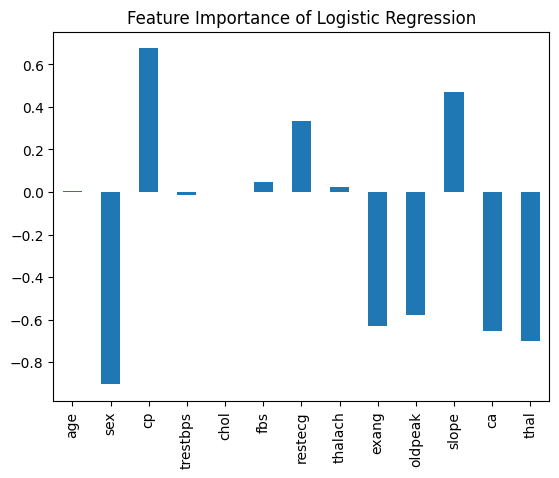

In [ ]:
# Visualize Feature Importance
feature_df = pd.DataFrame(feature_dict, index=[0])

feature_df.T.plot.bar(title='Feature Importance of Logistic Regression', legend=False);

In [ ]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [ ]:
X.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [ ]:
def predict_Heart_Disease(age,sex,cp,trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal):
    #loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = age
    x[1] = sex
    x[2] = cp
    x[3] = trestbps
    x[4] = chol
    x[5] = fbs
    x[6] = restecg
    x[7] = thalach
    x[8] = exang
    x[9] = oldpeak
    x[10] = slope
    x[11] = ca
    x[12] = thal
    #if loc_index >= 0:
       #x[loc_index] = 1

    return gs_log_reg.predict([x])[0]

In [ ]:
predict_Heart_Disease(57, 1, 0, 120, 100, 0, 1, 150,1, 3, 2, 1 ,2 )

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0